In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Book1.csv')
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
data = data.drop(['Car_Name'],axis=1)

In [4]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
print(data['Fuel_Type'].unique())
print(data['Seller_Type'].unique())
print(data['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
[0 1 3]


In [6]:
data = pd.get_dummies(data=data,drop_first=True)

In [7]:
data.isnull().sum()

Year                      0
Selling_Price             0
Present_Price             0
Kms_Driven                0
Owner                     0
Fuel_Type_Diesel          0
Fuel_Type_Petrol          0
Seller_Type_Individual    0
Transmission_Manual       0
dtype: int64

In [8]:
data['current_year']=2020

In [9]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,current_year
0,2014,3.35,5.59,27000,0,0,1,0,1,2020
1,2013,4.75,9.54,43000,0,1,0,0,1,2020
2,2017,7.25,9.85,6900,0,0,1,0,1,2020
3,2011,2.85,4.15,5200,0,0,1,0,1,2020
4,2014,4.60,6.87,42450,0,1,0,0,1,2020


In [10]:
data['no_of_years'] = data['current_year'] - data['Year']
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,current_year,no_of_years
0,2014,3.35,5.59,27000,0,0,1,0,1,2020,6
1,2013,4.75,9.54,43000,0,1,0,0,1,2020,7
2,2017,7.25,9.85,6900,0,0,1,0,1,2020,3
3,2011,2.85,4.15,5200,0,0,1,0,1,2020,9
4,2014,4.60,6.87,42450,0,1,0,0,1,2020,6


In [11]:
data.drop(['Year','current_year'],axis=1,inplace=True)

In [12]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,no_of_years
0,3.35,5.59,27000,0,0,1,0,1,6
1,4.75,9.54,43000,0,1,0,0,1,7
2,7.25,9.85,6900,0,0,1,0,1,3
3,2.85,4.15,5200,0,0,1,0,1,9
4,4.60,6.87,42450,0,1,0,0,1,6


In [13]:
X = data.iloc[:,1:]
Y = data.iloc[:,0]

In [14]:
X.head()

,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,no_of_years
0,5.59,27000,0,0,1,0,1,6
1,9.54,43000,0,1,0,0,1,7
2,9.85,6900,0,0,1,0,1,3
3,4.15,5200,0,0,1,0,1,9
4,6.87,42450,0,1,0,0,1,6


In [15]:
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

<AxesSubplot:>

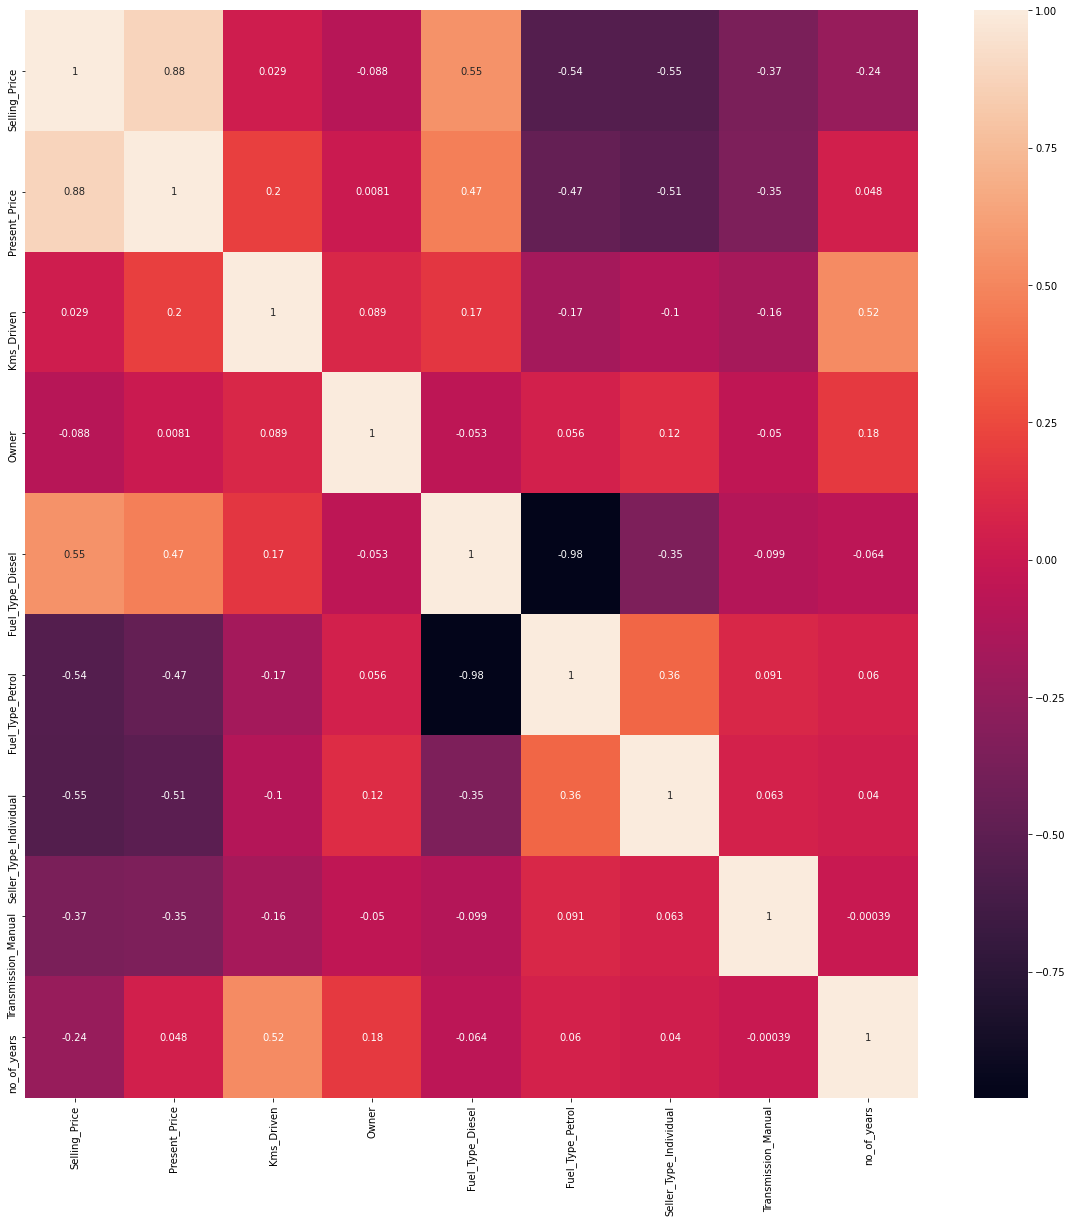

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.8,random_state=0)

In [21]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [28]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(i) for i in np.linspace(100,1000,10)]
max_depth = [int(i) for i in np.linspace(5,50,10)]
max_features = ['auto', 'sqrt']
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]


In [29]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
random_grid

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
 'min_samples_split': [2, 5, 10, 15, 100],
 'min_samples_leaf': [1, 2, 5, 10]}

In [30]:
model2 = RandomizedSearchCV(model,random_grid)

In [31]:
model2.fit(X_train,Y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]})

In [32]:
model2.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 45}

In [33]:
model2.best_score_

0.8335870543681683

In [35]:
prediction = model2.predict(X_test)
prediction

array([ 7.16879169,  0.58000317,  4.84083004,  9.06538608, 16.74725426,
        5.26621293,  3.64609944,  0.81171209,  4.65177569,  4.64703882,
        3.02025066,  0.89575459,  4.95511281,  7.47610295,  8.02913845,
       10.06684796,  7.30792823,  4.3529838 ,  0.57740877,  1.49406219,
        3.99979321,  4.99276401,  5.47827443,  8.89064998,  0.33723702,
        0.83547839,  0.52600213,  0.70372444,  0.63690314,  5.02025199,
        5.84325553,  6.13645355,  0.66846105,  8.56238456,  3.68920252,
        1.87434626,  5.81052416,  7.22733151,  0.40327969,  8.50105057,
        9.45249084, 19.56972473,  4.85281645,  4.46459175,  5.84796271,
       11.09663745,  0.51273785,  0.95630171,  5.04663044,  7.80656312,
        6.66520271,  3.56185786,  4.81104756, 20.39004735,  1.12479135,
        1.11478231,  0.69145595,  2.90991021,  3.82520537,  1.34597441,
        4.20730985])

c:\users\vinayak\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

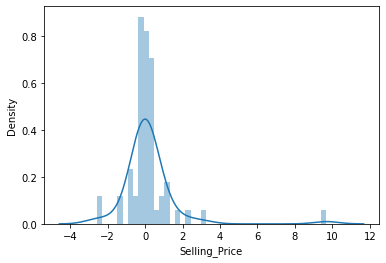

In [36]:
sns.distplot(Y_test-prediction)

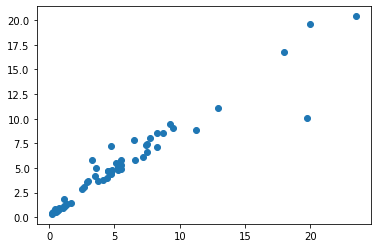

In [37]:
plt.scatter(Y_test,prediction)